In [15]:
from utils.functions import *

In [4]:
data = pd.read_csv('../data/clini_data.csv')

/tmp/ipykernel_24179/1979673808.py:1: DtypeWarning: Columns (2,3,4,5,10,11,12,13,14,15,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,41,42,43,68,79,80,81,82,88,89,94,95,97,98,99,100,101,102,104,105,109,110,111,112,113,114,115,116,118,121,122,151,163,169,184,192,193,194,195,196,200,206,210,212,213,214,215,216,217,218,219,220,222,223,225,226,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,254,262,263,264,265,266,275,279,280,282,283,284,285,286,287,300,301,302,303,304,308,320,321,322,324,325,326) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/clini_data.csv')


In [5]:
# On vérifie qu'on n'a pas de doublons
data['NCTId'].nunique() == len(data)

True

In [6]:
data.sample(10)[['NCTId','BriefTitle','StartDate', 'LocationCountry', 'StudyType', 'Phase']]

,NCTId,BriefTitle,StartDate,LocationCountry,StudyType,Phase
18716,NCT05912309,Effects of Time-restricted Eating and Exercise...,"September 1, 2023",Spain,Interventional,Not Applicable
89627,NCT04989569,Serial Body Composition Change for Risk Predic...,"August 1, 2020",Taiwan,Interventional,Not Applicable
22871,NCT05858268,NeuralNET Cerebral Palsy Pilot Study,"April 14, 2023",United Kingdom,Observational,NaN
41644,NCT05614063,A Randomized Study of XEN1101 Versus Placebo i...,"November 18, 2022",United States,Interventional,Phase 3
4494,NCT06097338,Quantitative US for Evaluation of Hepatic Stea...,October 2023,NaN,Observational,NaN
63792,NCT05325801,A Study of CAR-T Cells Targeting Both BCMA and...,April 2022,NaN,Interventional,Phase 1
99272,NCT04863963,Milligan-Morgan Versus Dearterialization With ...,"July 1, 2021",Italy,Observational,NaN
41641,NCT05614102,A First-in-human Study to Learn How Safe the S...,"November 4, 2022",United States,Interventional,Phase 1
88341,NCT05006300,Evaluation of the Efficacy of Topialyse Baume ...,September 2021,NaN,Interventional,Not Applicable
39728,NCT05638984,Low Dose Decitabine in Combination With Tireli...,"January 1, 2023",NaN,Interventional,Phase 2


In [7]:
from tabulate import tabulate
def afficher_colonnes_manquantes(df, seuil=0.95):
    """
    Affiche les colonnes d'un DataFrame ayant plus de seuil % de valeurs manquantes.

    Parameters:
    - df: Le DataFrame.
    - seuil: Le seuil (par défaut, 0.95 pour 95% de valeurs manquantes).
    """
    colonnes_manquantes = df.columns[df.isnull().mean() > seuil]
    
    if not colonnes_manquantes.empty:
        res = pd.DataFrame({
            'Colonne': colonnes_manquantes,
            'Nombre de valeurs manquantes': df[colonnes_manquantes].isnull().sum(),
            'Pourcentage de valeurs manquantes': df[colonnes_manquantes].isnull().mean() * 100
        }).reset_index(drop=True)
        
        print(tabulate(res, headers='keys', tablefmt='fancy_grid', showindex=False))
        print(f'Nombre de variables avec {seuil}% de valeurs manquantes :','\n', len(colonnes_manquantes))
    else:
        print("Aucune colonne avec plus de {:.0%} de valeurs manquantes.".format(seuil))


In [8]:
afficher_colonnes_manquantes(data, seuil=0.9995)

╒═════════════════════════════════════════╤════════════════════════════════╤═════════════════════════════════════╕
│ Colonne                                 │   Nombre de valeurs manquantes │   Pourcentage de valeurs manquantes │
╞═════════════════════════════════════════╪════════════════════════════════╪═════════════════════════════════════╡
│ BaselineMeasureCalculatePct             │                          99967 │                              99.967 │
├─────────────────────────────────────────┼────────────────────────────────┼─────────────────────────────────────┤
│ BaselineMeasureDenomCountGroupId        │                          99995 │                              99.995 │
├─────────────────────────────────────────┼────────────────────────────────┼─────────────────────────────────────┤
│ BaselineMeasureDenomCountValue          │                          99996 │                              99.996 │
├─────────────────────────────────────────┼────────────────────────────────┼────

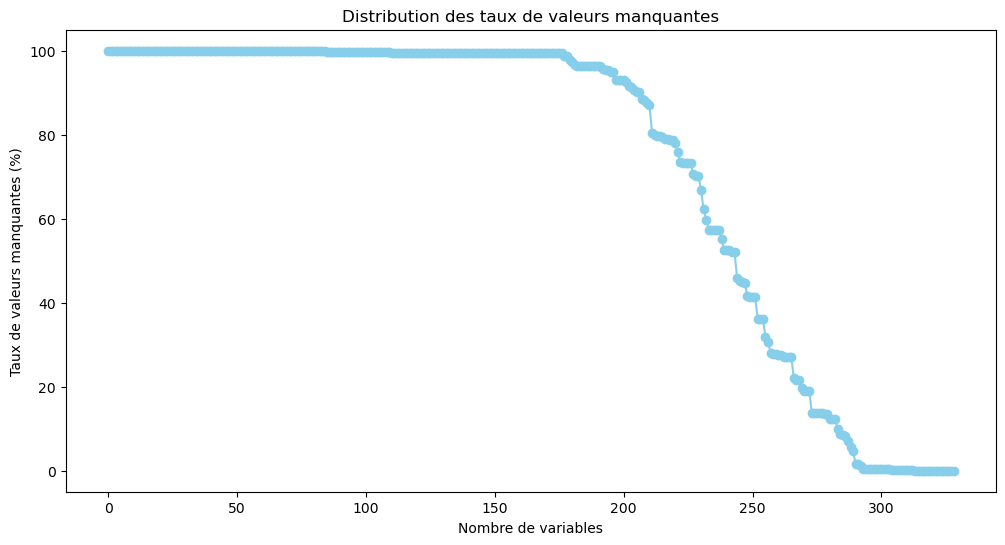

In [14]:
plot_distribution_valeurs_manquantes(data)